### 1. install packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import regressors.stats
import warnings
warnings.filterwarnings("ignore")

### 2. read data and data procesing

In [2]:
# read data
df = pd.read_csv('./available_data/HousePrice(including sentiment).csv')

# data processing
# filling missing data
df['total income'].fillna(method='pad',inplace=True)
# create variable 'average disposable income'
df['average disposable income'] = df['total income']/df['Domestic Households']
# In case the denominator is 0
df['land area'] = df['land area'].apply(lambda x: 1 if x == 0 else x)
# create variable 'price per land'
df['price per land'] = df['land price']/df['land area']
df.head()

,date,Housing CPI,unemployment rate,Domestic Households,total income,land area,land price,Total loans approved,sentiment,Domestic Price Indices,average disposable income,price per land
0,2002-1,72.7,6.3,2079.5,103629.3333,1.0,0.0,11467,6.392807,74.1,49.833774,0.000000
1,2002-2,72.5,6.6,2083.8,103629.3333,10290.0,301.0,7947,6.933953,73.9,49.730940,0.029252
2,2002-3,72.2,6.9,2087.2,103629.3333,1.0,0.0,8206,5.776455,73.3,49.649930,0.000000
3,2002-4,71.9,7.1,2091.7,103079.6667,48170.0,2970.0,8816,5.716957,72.3,49.280330,0.061657
4,2002-5,71.7,7.3,2097.1,103079.6667,1.0,0.0,10209,5.808039,72.4,49.153434,0.000000


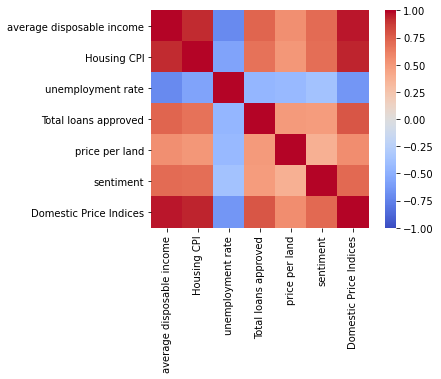

In [3]:
# plot heatmap to check correlations between variables
df1 = df[['average disposable income','Housing CPI','unemployment rate','Total loans approved','price per land','sentiment','Domestic Price Indices']]
corrmatrix = df1.corr('spearman')
sns.heatmap(corrmatrix,square=True,vmax=1,vmin=-1,center=0.0,cmap='coolwarm')
plt.show()

### 3. feature selection

In [4]:
# model1: without sentiment index
# response
y = df['Domestic Price Indices']
# features
X = df[['average disposable income','unemployment rate','Total loans approved','price per land']]

# model2: with sentiment index
# features1
X1 = df[['average disposable income','unemployment rate','Total loans approved','price per land','sentiment']]

### 4. standardization and partitioning

In [5]:
# model1 standardization
Transfer = StandardScaler()
X = Transfer.fit_transform(X)
# model2 standardization
Transfer = StandardScaler()
X1 = Transfer.fit_transform(X1)

# model1 data set partitioning
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
# model2 data set partitioning
x_train1,x_test1,y_train1,y_test1 = train_test_split(X1,y,test_size=0.2,random_state=10)

## 5.training data
### 5.1. ridge regression model
#### 1) model without sentiment index

In [6]:
# train data
estimator = linear_model.RidgeCV()
estimator.fit(x_train,y_train)
print('Ridge coefficient:\n',estimator.coef_)
print('Ridge intercept:\n',estimator.intercept_)

# prediction
y_predict = estimator.predict(x_test)

# model evaluation
Ridge_mse = mean_squared_error(y_test,y_predict)
print('Ridge mse:',Ridge_mse)
Ridge_mae = mean_absolute_error(y_test,y_predict)
print('Ridge mae:',Ridge_mae)
Ridge_score = r2_score(y_test,y_predict)
print('R2 score: ',Ridge_score)

Ridge coefficient:
 [116.45091112  13.33220002   4.33769863   0.58982215]
Ridge intercept:
 210.929349655904
Ridge mse: 576.3557674975624
Ridge mae: 18.77958477729679
R2 score:  0.9570359424004364


#### 2) model with sentiment index

In [7]:
# train data
estimator = linear_model.RidgeCV()
estimator.fit(x_train1,y_train1)
print('Ridge coefficient:\n',estimator.coef_)
print('Ridge intercept:\n',estimator.intercept_)

# prediction
y_predict1 = estimator.predict(x_test1)

# model evaluation
Ridge_mse1 = mean_squared_error(y_test1,y_predict1)
print('Ridge mse:',Ridge_mse1)
Ridge_mae1 = mean_absolute_error(y_test1,y_predict1)
print('Ridge mae:',Ridge_mae1)
Ridge_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',Ridge_score1)

Ridge coefficient:
 [102.75509876   9.39573037   5.98714238   0.20446041  13.32851067]
Ridge intercept:
 210.68889329932543
Ridge mse: 557.3356227885592
Ridge mae: 18.055500624899082
R2 score:  0.9584537864455784


In [8]:
# obtain p-value of each variable
print(regressors.stats.summary(estimator,x_test1,y_test1))

Residuals:
     Min      1Q  Median      3Q     Max
-35.7848 -6.4143  6.0033 19.8134 65.8686


Coefficients:
              Estimate  Std. Error  t value   p value
_intercept  210.688893    3.465095  60.8032  0.000000
x1          102.755099    6.946086  14.7932  0.000000
x2            9.395730    4.618907   2.0342  0.047598
x3            5.987142    4.599320   1.3017  0.199348
x4            0.204460    3.412541   0.0599  0.952478
x5           13.328511    5.294559   2.5174  0.015290
---
R-squared:  0.95845,    Adjusted R-squared:  0.95351
F-statistic: 193.78 on 5 features
None


### 5.2 Decision tree regression model
#### 1) model without sentiment index

In [9]:
# train data
estimator = DecisionTreeRegressor(random_state=10,max_depth=5)
# adjust hyper-parameter
estimator= GridSearchCV(estimator,param_grid ={'max_depth':range(1,10)},cv=10)
estimator.fit(x_train,y_train)
print('best parameter: ',estimator.best_params_)

# prediction
y_predict = estimator.predict(x_test)

# model evaluation
DT_mse = mean_squared_error(y_test,y_predict)
print('DT mse:',DT_mse)
DT_mae = mean_absolute_error(y_test,y_predict)
print('DT mae:',DT_mae)
DT_score = r2_score(y_test,y_predict)
print('R2 score: ',DT_score)

best parameter:  {'max_depth': 5}
DT mse: 370.0838183187905
DT mae: 11.756351949402928
R2 score:  0.9724123477484206


#### 2) model with sentiment index

In [10]:
# train data
estimator = DecisionTreeRegressor(random_state=10, max_depth=10)
# adjust hyper-parameter
estimator= GridSearchCV(estimator,param_grid ={'max_depth':range(1,15)},cv=10)
estimator.fit(x_train1,y_train1)
print('best parameter: ',estimator.best_params_)

# prediction
y_predict1 = estimator.predict(x_test1)

# model evaluation
DT_mse1 = mean_squared_error(y_test1,y_predict1)
print('DT mse:',DT_mse1)
DT_mae1 = mean_absolute_error(y_test1,y_predict1)
print('DT mae:',DT_mae1)
DT_score1 = r2_score(y_test1,y_predict1)
print('R2 score: ',DT_score1)

best parameter:  {'max_depth': 10}
DT mse: 276.31140624999995
DT mae: 9.163541666666665
R2 score:  0.9794025498780289


### 5.3 Random Forest regression model
#### 1) model without sentiment index

In [11]:
# train data
estimator = RandomForestRegressor(n_estimators=30,max_depth=8,random_state=10)
# adjust hyper-parameter
estimator= GridSearchCV(estimator, param_grid ={'max_depth':range(1,10)},cv=10)
estimator.fit(x_train,y_train)
print('best parameter: ',estimator.best_params_)

# prediction
y_predict = estimator.predict(x_test)

# model evaluation
RF_mse = mean_squared_error(y_test,y_predict)
print('RF mse:',RF_mse)
RF_mae = mean_absolute_error(y_test,y_predict)
print('RF mae:',RF_mae)
RF_score = r2_score(y_test,y_predict)
print('R2 score: ',RF_score)

best parameter:  {'max_depth': 8}
RF mse: 249.90064511561002
RF mae: 10.839951556738024
R2 score:  0.9813713225122527


#### 2) model with sentiment index

In [12]:
# train data
estimator = RandomForestRegressor(n_estimators=30,max_depth=7,random_state=10)
# adjust hyper-parameter
estimator= GridSearchCV(estimator, param_grid ={'max_depth':range(1,10)},cv=10)
estimator.fit(x_train1,y_train1)
print('best parameter: ',estimator.best_params_)

# prediction
y_predict1 = estimator.predict(x_test1)

# model evaluation
RF_mse = mean_squared_error(y_test1,y_predict1)
print('RF mse:',RF_mse)
RF_mae = mean_absolute_error(y_test1,y_predict1)
print('RF mae:',RF_mae)
RF_score = r2_score(y_test1,y_predict1)
print('R2 score: ',RF_score)

best parameter:  {'max_depth': 7}
RF mse: 220.41728598404993
RF mae: 10.336048185245552
R2 score:  0.9835691399219003


### 5.4 SVR model
#### 1) model without sentiment index

In [13]:
# train data
estimator = SVR(kernel='linear')
estimator.fit(x_train,y_train)

# prediction
y_predict = estimator.predict(x_test)

# model evaluation
svm_mse = mean_squared_error(y_test,y_predict)
print('svm mse:',svm_mse)
svm_mae = mean_absolute_error(y_test,y_predict)
print('svm mae:',svm_mae)
svm_score = r2_score(y_test,y_predict)
print('R2 score: ',svm_score)

svm mse: 1287.7721814923946
svm mae: 26.97115600426406
R2 score:  0.9040038786789986


#### 2) model with sentiment index

In [14]:
# train data
estimator = SVR(kernel='linear')
estimator.fit(x_train1,y_train1)

# prediction
y_predict1 = estimator.predict(x_test1)

# model evaluation
svm_mse = mean_squared_error(y_test1,y_predict1)
print('svm mse:',svm_mse)
svm_mae = mean_absolute_error(y_test1,y_predict1)
print('svm mae:',svm_mae)
svm_score = r2_score(y_test1,y_predict1)
print('R2 score: ',svm_score)

svm mse: 1110.0417615225613
svm mae: 26.854057372623583
R2 score:  0.9172526747029073


### 5.5 xgboost regression model
#### 1) model without sentiment index

In [15]:
# train data
estimator = XGBRegressor(learning_rate=0.1,max_depth=6,n_estimators=60,min_child_weight=4,gamma=0.1,subsample=0.9,colsample_bytree=0.8)
# adjust parameter
estimator= GridSearchCV(estimator, param_grid ={'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]},cv=10)
estimator.fit(x_train,y_train)
print('best parameter: ',estimator.best_params_)

# prediction
y_predict = estimator.predict(x_test)

# model evaluation
xg_mse = mean_squared_error(y_test,y_predict)
print('xg mse:',xg_mse)
xg_mae = mean_absolute_error(y_test,y_predict)
print('xg mae:',xg_mae)
xg_score = r2_score(y_test,y_predict)
print('R2 score: ',xg_score)

best parameter:  {'colsample_bytree': 0.8}
xg mse: 234.44237416904932
xg mae: 11.349598773320517
R2 score:  0.9825236490452574


#### 2) model with sentiment index

In [16]:
# train data
estimator = XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=70,min_child_weight=4,gamma=0.3,subsample=0.9,colsample_bytree=0.8)
# adjust parameter
estimator= GridSearchCV(estimator, param_grid ={'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]},cv=10)
estimator.fit(x_train1,y_train1)
print('best parameter: ',estimator.best_params_)

# prediction
y_predict1 = estimator.predict(x_test1)

# model evaluation
xg_mse = mean_squared_error(y_test1,y_predict1)
print('xg mse:',xg_mse)
xg_mae = mean_absolute_error(y_test1,y_predict1)
print('xg mae:',xg_mae)
xg_score = r2_score(y_test1,y_predict1)
print('R2 score: ',xg_score)

best parameter:  {'colsample_bytree': 0.8}
xg mse: 223.7780422522528
xg mae: 11.283283122380574
R2 score:  0.9833186145796936
